## Long Short-Term Memory 

In this assignment, we will learn about LSTM models. We will create an LSTM model for time series prediction.

In [1]:
import numpy as np
import os
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Below is a function for loading time series data collected by sensors. There are 9 different files, We have data about body acceleration, body gyro, and total acceleration for the x, y, and z axis

In [3]:
def load_func(path, file_ind=False):
    data_list = []
    if file_ind:
        filenames = [path]
    else:
        files = os.listdir(path)
        filenames = [path + '/' + f for f in files]
    for f in filenames:
        dataframe = pd.read_csv(f, header=None, delim_whitespace=True)
        data_list.append(dataframe.values)
    if len(data_list) > 1:
        return np.dstack(data_list)
    else:
        return data_list[0]

In [4]:
os.listdir('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals')

['body_acc_y_test.txt',
 'body_acc_z_test.txt',
 'body_acc_x_test.txt',
 'total_acc_x_test.txt',
 'total_acc_y_test.txt',
 'total_acc_z_test.txt',
 'body_gyro_x_test.txt',
 'body_gyro_z_test.txt',
 'body_gyro_y_test.txt']

In [5]:
X_train = load_func("/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals")
X_test = load_func("/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals")
y_train_cat = load_func('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', True)
y_test_cat = load_func('/content/drive/MyDrive/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', True)

Print the dimensions of both the predictor variables and the target.

In [6]:
# Answer below:
X_train.shape, X_test.shape, y_train_cat.shape, y_test_cat.shape

((7352, 128, 9), (2947, 128, 9), (7352, 1), (2947, 1))

The target variable is categorical. One hot encode the target variable.

In [7]:
np.unique(y_train_cat)

array([1, 2, 3, 4, 5, 6])

In [8]:
# -1 for indexing to set categories to 6
y_train = to_categorical(y_train_cat - 1, 6)
y_test = to_categorical(y_test_cat - 1, 6)

In [9]:
y_train[0:3]

array([[0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

Create a model containing an LSTM layer with unit size 100, and input shape that is the tuple containing the number of columns in X and the number of files in X.

The next layer is a dropout layer. Choose 0.5 for the proportion. Then add a dense layer of unit size 100 and finally an output dense layer. 

In [40]:
timesteps, features, outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]

model = Sequential()
model.add(LSTM(100, input_shape=(timesteps, features)))
model.add(Dropout(0.025))
model.add(Dense(100, activation='relu'))
model.add(Dense(outputs, activation='softmax'))

Print the model summary to ensure you have the correct number of parameters.

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 100)               44000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                6464      
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 390       
Total params: 50,854
Trainable params: 50,854
Non-trainable params: 0
_________________________________________________________________


Compile and fit the model. Select the appropriate activation, loss, and optimizer.

Run the model for 10 epochs with a batch size of 80.

In [41]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
hist = model.fit(X_train, y_train, epochs=50, batch_size=80, validation_data=(X_test, y_test))

Epoch 1/50
92/92 [==============================] - 3s 16ms/step - loss: 1.4059 - accuracy: 0.4432 - val_loss: 1.0412 - val_accuracy: 0.5914
Epoch 2/50
92/92 [==============================] - 1s 10ms/step - loss: 0.7431 - accuracy: 0.6953 - val_loss: 0.6830 - val_accuracy: 0.7221
Epoch 3/50
92/92 [==============================] - 1s 10ms/step - loss: 0.5282 - accuracy: 0.7835 - val_loss: 0.7105 - val_accuracy: 0.7285
Epoch 4/50
92/92 [==============================] - 1s 10ms/step - loss: 0.4067 - accuracy: 0.8562 - val_loss: 0.6217 - val_accuracy: 0.7771
Epoch 5/50
92/92 [==============================] - 1s 11ms/step - loss: 0.2710 - accuracy: 0.9040 - val_loss: 0.9551 - val_accuracy: 0.7099
Epoch 6/50
92/92 [==============================] - 1s 11ms/step - loss: 0.2260 - accuracy: 0.9134 - val_loss: 0.9167 - val_accuracy: 0.7129
Epoch 7/50
92/92 [==============================] - 1s 10ms/step - loss: 0.1681 - accuracy: 0.9336 - val_loss: 0.8618 - val_accuracy: 0.7465
Epoch 8/50
92

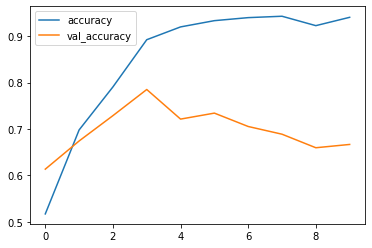

In [33]:
res = pd.DataFrame(hist.history)
res[['accuracy', 'val_accuracy']].plot()

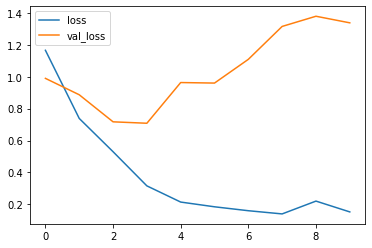

In [34]:
res[['loss', 'val_loss']].plot()

Print the confusion matrix for the test data.

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

y_pred = np.argmax(model.predict(X_test), axis=-1)

cm = confusion_matrix(y_test_cat-1, y_pred)

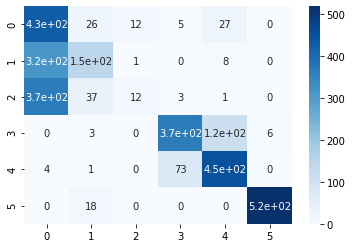

In [22]:
sb.heatmap(cm, annot=True, cmap="Blues")